In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

from stats_ops import calculate_metrics

%load_ext autoreload
%autoreload 2

# Scatter plot: WestUS

In [4]:
model_version = 'v11'      ###########################

# laoding train-test dataframe
train_df = pd.read_csv(f'../../Model_run/ML_model/Model_csv/train_obsv_pred_{model_version}.csv')
test_df = pd.read_csv(f'../../Model_run/ML_model/Model_csv/test_obsv_pred_{model_version}.csv')

In [5]:
# # calculate error metrics

# train set
train_metrics = calculate_metrics(predictions=train_df['predicted'], targets=train_df['actual'])

print('train_metrics:', train_metrics)

# test set
test_metrics = calculate_metrics(predictions=test_df['predicted'], targets=test_df['actual'])

print('\ntest metrics:', test_metrics)

train_metrics: {'RMSE': 61.63800583896066, 'MAE': 42.30335113347942, 'R2': 0.6498350994698364, 'Normalized RMSE': 0.48015995028506314, 'Normalized MAE': 0.3295430262655226, 'PBIAS': 7.799574017454932}

test metrics: {'RMSE': 64.38699884609404, 'MAE': 43.57308027191636, 'R2': 0.6243921909608858, 'Normalized RMSE': 0.4993835260170599, 'Normalized MAE': 0.3379514320527149, 'PBIAS': 8.592047822293427}


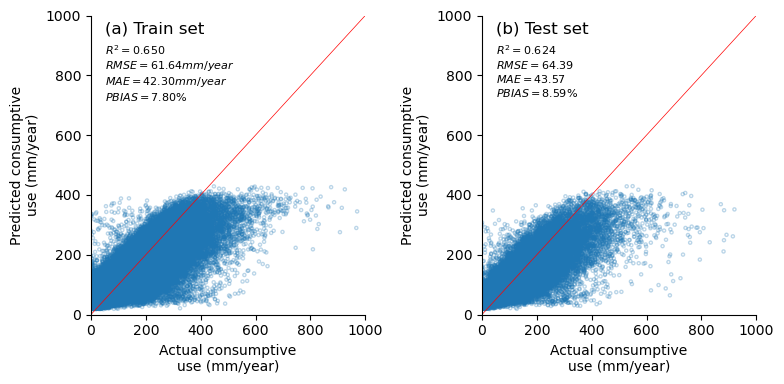

In [6]:
# plotting
fig, ax = plt.subplots(1, 2, figsize = (8, 4))

plt.rcParams['font.size'] = '12'

min_val = 0
max_val = 1000

# plot for train set
ax[0].scatter(data= train_df, x= 'actual', y ='predicted', label='Train set', 
                facecolor='none', edgecolor='tab:blue', s=5, alpha=0.3)
ax[0].plot([min_val, max_val], [min_val, max_val], '-r', linewidth=0.5)
ax[0].set_xlabel('Actual consumptive\nuse (mm/year)')
ax[0].set_ylabel('Predicted consumptive\nuse (mm/year)')
ax[0].set_xlim([min_val, max_val])
ax[0].set_ylim([min_val, max_val])


# plot for test set
ax[1].scatter(data= test_df, x= 'actual', y ='predicted', label='Test set', 
                facecolor='none', edgecolor='tab:blue', s=5, alpha=0.3)
ax[1].plot([min_val, max_val], [min_val, max_val], '-r', linewidth=0.5)
ax[1].set_xlabel('Actual consumptive\nuse (mm/year)')
ax[1].set_ylabel('Predicted consumptive\nuse (mm/year)')
ax[1].set_xlim([min_val, max_val])
ax[1].set_ylim([min_val, max_val])


# Evaluation metrics
ax[0].text(
    0.05, 0.98,          
    "(a) Train set",
    transform=ax[0].transAxes,
    ha='left', va='top',
    fontsize=12,         
    # fontweight='bold'     # bold
)
ax[0].text(
    0.05, 0.95,
    (   
        f"\n$R^2 = {train_metrics['R2']:.3f}$\n"
        f"$RMSE = {train_metrics['RMSE']:.2f} mm/year$\n"
        f"$MAE = {train_metrics['MAE']:.2f} mm/year$\n"
        f"$PBIAS = {train_metrics['PBIAS']:.2f}\\%$"
    ),
    transform=ax[0].transAxes,
    ha='left', va='top',
    fontsize=8
)

ax[1].text(
    0.05, 0.98,        
    "(b) Test set",
    transform=ax[1].transAxes,
    ha='left', va='top',
    fontsize=12,         
    # fontweight='bold'     # bold
)

ax[1].text(
    0.05, 0.95,
    (
        f"\n$R^2 = {test_metrics['R2']:.3f}$\n"
        f"$RMSE = {test_metrics['RMSE']:.2f}$\n"
        f"$MAE = {test_metrics['MAE']:.2f}$\n"
        f"$PBIAS = {test_metrics['PBIAS']:.2f}\\%$"
    ),
    transform=ax[1].transAxes,
    ha='left', va='top',
    fontsize=8
)


# Hide only the top and right spines (keep bottom and left axes visible)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('../../Model_run/plots/train_test_set_scatter.jpg', dpi=300)

# Model bias check

In [7]:
# calculating residual and standardized residuals
train_df['residual'] = train_df['actual'] - train_df['predicted']
test_df['residual'] = test_df['actual'] - test_df['predicted']

train_df['std_residual'] = train_df['residual'] / np.std(train_df['residual'])
test_df['std_residual'] = test_df['residual'] / np.std(test_df['residual'])

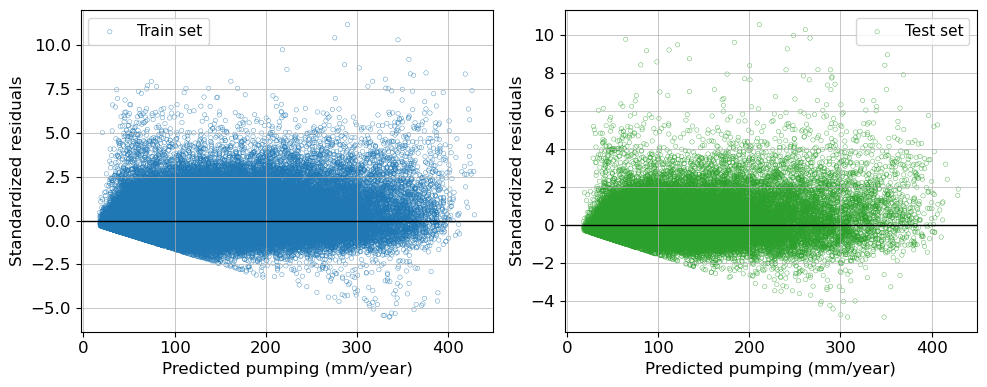

In [8]:
# plotting
fig, ax = plt.subplots(1, 2, figsize = (10, 4))

plt.rcParams['font.size'] = '11'

# residual plot for train set
sns.scatterplot(data= train_df, x= 'predicted', y ='std_residual', ax=ax[0], label='Train set', 
                facecolor='none', edgecolor='tab:blue', s=10)
ax[0].axhline(0, color='black', linestyle='-', linewidth=1)

ax[0].set_xlabel('Predicted pumping (mm/year)')
ax[0].set_ylabel('Standardized residuals')
ax[0].grid(True, linestyle='-', linewidth=0.5)
ax[0].legend()

# residual plot for test set
sns.scatterplot(data= test_df, x= 'predicted', y ='std_residual', ax=ax[1], label='Test set', 
                facecolor='none', edgecolor='tab:green', s=10)
ax[1].axhline(0, color='black', linestyle='-', linewidth=1)
ax[1].set_xlabel('Predicted pumping (mm/year)')
ax[1].set_ylabel('Standardized residuals')
ax[1].grid(True, linestyle='-', linewidth=0.5)
ax[1].legend()

plt.tight_layout()

`Standardized residuals seem evenly distributed. But as the prediction ends in 450 mm ish, due to underprediction of higher value, we can't see the underprediction at high ranges from these residual plots.`

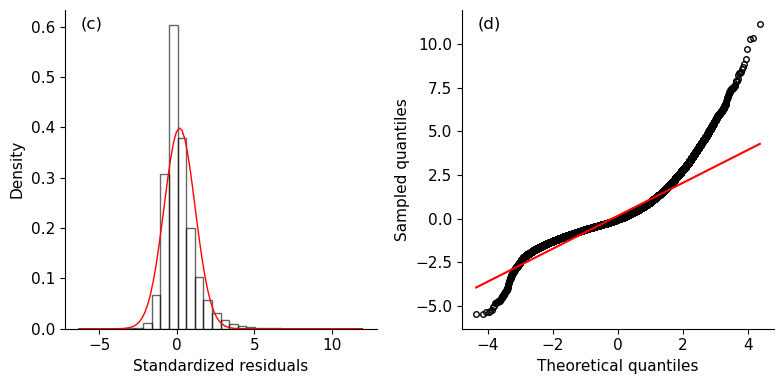

In [9]:
# Standardized residuals' histogram
fig, ax = plt.subplots(1, 2, figsize=(8, 4))

plt.rcParams['font.size'] = '12'

# Histogram with density plot
ax[0].hist(train_df['std_residual'], bins=30, density=True, alpha=0.6, edgecolor='black', facecolor='none')

xmin, xmax = ax[0].get_xlim()
x = np.linspace(xmin, xmax, 100)  # Generates 100 points between the min and max residual values
p = stats.norm.pdf(x, np.mean(test_df['std_residual']), np.std(test_df['std_residual']))  # Computes normal distribution

ax[0].plot(x, p, 'r', linewidth=1)
ax[0].set_xlabel('Standardized residuals')
ax[0].set_ylabel('Density')


# Q-Q Plot
stats.probplot(train_df['std_residual'], dist="norm", plot=ax[1])
ax[1].set_ylabel('Sampled quantiles')
ax[1].set_title("")

# Get the artists that probplot added
points = ax[1].get_lines()[0]   # scatter points
fitline = ax[1].get_lines()[1]  # fitted line

# Style the points: black edge, hollow
points.set_marker('o')
points.set_markersize(4)
points.set_markerfacecolor('none')
points.set_markeredgecolor('black')

# texts
ax[0].text(
    0.05, 0.98,          
    "(c)",
    transform=ax[0].transAxes,
    ha='left', va='top',
    fontsize=12,          
    # fontweight='bold'     # bold
)


ax[1].text(
    0.05, 0.98,        
    "(d)",
    transform=ax[1].transAxes,
    ha='left', va='top',
    fontsize=12,         
    # fontweight='bold'     # bold
)


# Hide only the top and right spines (keep bottom and left axes visible)
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig('../../Model_run/plots/test_set_residual.jpg', dpi=300)

`The standardized residuals exhibit an approximately bell‑shaped distribution centered near zero, with slight right skew, indicating that the normality assumption is reasonably satisfied for the bulk of the data. Heteroscedasticity cannot be assessed from the histogram alone; therefore, additional residual‑versus‑fitted plots were examined to evaluate constancy of variance. The normal Q–Q plot shows that most residuals lie close to the reference line, with noticeable departures in the extreme quantiles, suggesting heavier tails and the presence of a small number of relatively large positive and negative residuals.`

------------------

# Determining the threholds of GW use % in the training data

In [16]:
import os
import pandas as pd
from glob import glob
import rioxarray as rxr

In [17]:
# GW use % data from USGS
# This data stays constant annually
gw_use_perc = '../../Data_main/rasters/USGS_GW_%/GW_perc_2000.tif'
gw_arr = rxr.open_rasterio(gw_use_perc)

# # updating GW use % data in the Rio Grande Basin (we know for sure that they are ~100% GW irrigated)
# geographic bounds (Rio Grande region)
lat_min, lat_max = 36.96, 38.498
lon_min, lon_max = -106.657, -105.128

# setting values of the lat-lon window to 100%
gw_arr.loc[
dict(
    y=slice(lat_max, lat_min),
    x=slice(lon_min, lon_max)
    )] = 100

# training data
training_data = glob(os.path.join('../../Data_main/pumping/rasters/WestUS_consumptive_gw', '*.tif'))

# collecting data into a dataframe
pump_dict = {'gw_perc': [], 'pump': []}

for data in training_data:
    gw_arr_val = gw_arr.values.flatten()
    pump_arr = rxr.open_rasterio(data).squeeze().values.flatten()

    pump_dict['gw_perc'].extend(list(gw_arr_val))
    pump_dict['pump'].extend(list(pump_arr))

In [18]:
pump_df = pd.DataFrame(pump_dict)
pump_df = pump_df[(pump_df!=-9999).all(axis=1)]
pump_df.head()

,gw_perc,pump
721088,65.647621,8.788617
721091,65.647621,25.556786
722566,99.585716,151.999374
722641,92.142860,32.316830
722645,92.142860,39.998699


In [19]:
perc_greater_95 = len(pump_df[pump_df['gw_perc'] >= 95]) * 100 / len(pump_df)
perc_greater_80 = len(pump_df[pump_df['gw_perc'] >= 80]) * 100 / len(pump_df)
perc_greater_70 = len(pump_df[pump_df['gw_perc'] >= 70]) * 100 / len(pump_df)
perc_greater_60 = len(pump_df[pump_df['gw_perc'] >= 60]) * 100 / len(pump_df)
perc_less_60 = len(pump_df[pump_df['gw_perc'] < 60]) * 100 / len(pump_df)

print('GW pumping % in training pixels\n')
print(f'percent >= 95%: {perc_greater_95}')
print(f'percent between 80 to 95%: {perc_greater_80 - perc_greater_95}')
print(f'percent between 70 to 80%: {perc_greater_70 - perc_greater_80}')
print(f'percent between 60 to 70%: {perc_greater_60 - perc_greater_70}')
print(f'percent < 60 % to 70%: {perc_less_60}')

GW pumping % in training pixels

percent >= 95%: 84.36628004253045
percent between 80 to 95%: 7.722947554768766
percent between 70 to 80%: 3.5827050016461612
percent between 60 to 70%: 1.0762147895875955
percent < 60 % to 70%: 3.2518526114670308


---------------

### % of training data with > 500 mm/year values

In [20]:
greater_500_values = len(pump_df[pump_df['pump'] >=500])

print('% values > 55 mm/year :', greater_500_values * 100 / len(pump_df)) 

% values > 55 mm/year : 0.5483621997096271
